In [2]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.data_transformers.disable_max_rows()
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [3]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
# What are the places that people most frequently overdose (residences, motels, parks, streets)? 
# How does Connecticut’s prescription tendencies compare to the national average?
# How many actually die the hospital? How many don't reach the hospital?
# How to deal with cocktail of drugs data?

In [5]:
df = pd.read_csv("Accidental_Drug_Related_Deaths_2012-2018.csv")

In [6]:
df.head()

,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,DeathCity,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,DateReported,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,DateofDeath,48.0,Male,Black,NORWALK,NaN,NaN,NORWALK,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,DateofDeath,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,DANBURY,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,DateofDeath,23.0,Male,White,RYE,WESTCHESTER,NY,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,DateofDeath,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,GREENWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [7]:
df = df.drop(['DateType', 'ResidenceCounty', 'ResidenceState', 'DeathCounty', 'InjuryCity', 'InjuryCounty', 'InjuryState', 'OtherSignifican', 'MannerofDeath'], axis=1)

In [8]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,...,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,NaN,Substance Abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,23.0,Male,White,RYE,GREENWICH,Hospital,NaN,substance abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,NaN,Transdermal Absorption,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [9]:
df.Date = df.Date.replace(r'\d\d/\d\d/','', regex=True)

In [10]:
df.Date =df.Date.replace(r'\d\d:.*', '', regex=True)

In [11]:
df_age = pd.DataFrame(df.groupby('Date').Age.value_counts())

In [12]:
df_age = pd.DataFrame(df.groupby('Date').Age.value_counts())

In [13]:
df_age=df_age.reset_index(level='Date')

In [14]:
df_age=df_age.rename(columns={'Age': 'agecount'})

In [15]:
df_age = df_age.reset_index()

In [16]:
df_age.head()

,Age,Date,agecount
0,35.0,1/1/12 0:00,1
1,50.0,1/1/13 0:00,1
2,25.0,1/1/15 0:00,1
3,29.0,1/1/15 0:00,1
4,69.0,1/1/15 0:00,1


In [17]:
df.Date = df.Date.astype(str)

In [18]:
df.Date = df.Date.str.strip()

In [19]:
df['Heroin'] = df.Heroin.replace({'Y': 'Heroin'})

In [20]:
df['Cocaine'] = df.Cocaine.replace({'Y': 'Cocaine'})

In [21]:
df['Fentanyl'] = df.Fentanyl.replace({'Y': 'Fentanyl'})

In [22]:
df['Ethanol'] = df.Ethanol.replace({'Y': 'Ethanol'})

In [23]:
df['Hydrocodone'] = df.Hydrocodone.replace({'Y': 'Hydrocodone'})

In [24]:
df['Benzodiazepine'] = df.Benzodiazepine.replace({'Y': 'Benzodiazepine'})

In [25]:
df['Methadone'] = df.Methadone.replace({'Y': 'Methadone'})

In [26]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,...,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,NaN,Substance Abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,23.0,Male,White,RYE,GREENWICH,Hospital,NaN,substance abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,22.0,Male,"Asian, Other",FLUSHING,GREENWICH,Hospital,NaN,Transdermal Absorption,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [27]:
df['Race'] = df.Race.replace({
    'Asian Indian': 'Asian',
    'Asian, Other': 'Asian',
    'Chinese': 'Asian',
    'Hawaiian': 'Other',
    'Unknown': 'Other',
    'Hispanic, Black': 'Hispanic',
    'Hispanic, White': 'Hispanic',
    'Native American, Other': 'Native American',
})

In [28]:
df.InjuryPlace.value_counts().head(30)

Residence                           3601
Other                                269
Residential Building                 241
Hotel or Motel                       227
Unknown                              176
In Vehicle                            57
Automobile                            46
Other, Other Outdoor Area             42
Parking Lot                           41
Halfway House                         33
House                                 25
Apartment                             19
Restaurant                            19
Other indoor Area                     17
Apartment House                       12
Other, Public Buildings               11
Other (unknown)                       10
Nursing Home                          10
Public Park                            9
Driveway                               9
Street                                 8
Forest, Wooded Area                    8
Sidewalk                               8
Porch                                  7
Alleyway        

In [29]:
df['InjuryPlace'] = df.InjuryPlace.replace({
    'Automobile': 'In Vehicle',
    'Other, Other Outdoor Area': 'Outdoor Area',
    'Other, Public Buildings': 'Public Buildings',
    'Other (unknown)': 'Unknown',
    'Other, Park or Recreational Area': 'Park or Recreational Area',
})

In [30]:
df.head()

,ID,Date,Age,Sex,Race,ResidenceCity,DeathCity,Location,LocationifOther,DescriptionofInjury,...,Amphet,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,14-0273,6/28/14 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,substance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,13-0102,3/21/13 0:00,48.0,Male,Black,NORWALK,NORWALK,Hospital,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,16-0165,3/13/16 0:00,30.0,Female,White,SANDY HOOK,DANBURY,Hospital,NaN,Substance Abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,16-0208,3/31/16 0:00,23.0,Male,White,RYE,GREENWICH,Hospital,NaN,substance abuse,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,13-0052,2/13/13 0:00,22.0,Male,Asian,FLUSHING,GREENWICH,Hospital,NaN,Transdermal Absorption,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"


In [31]:
df.InjuryPlace.value_counts()

Residence                         3601
Other                              269
Residential Building               241
Hotel or Motel                     227
Unknown                            186
In Vehicle                         103
Outdoor Area                        42
Parking Lot                         41
Halfway House                       33
House                               25
Restaurant                          19
Apartment                           19
Other indoor Area                   17
Apartment House                     12
Public Buildings                    11
Nursing Home                        10
Driveway                             9
Public Park                          9
Forest, Wooded Area                  8
Sidewalk                             8
Street                               8
Alleyway                             7
Park or Recreational Area            7
Porch                                7
Building                             6
Store or Shopping Area   

In [32]:
df['InjuryPlace'] = df.InjuryPlace.replace({
    'Residential Building': 'Residence',
    'residential building': 'Residence',
    'House': 'Residence',
    'Other, Industrial Area': 'Indoor Area',
    'Other, Health Care Facility': 'Health Care Facility',
    'University or College': 'College Campus',
    'Apartment': 'Residence',
    'Driveway': 'Parking Lot',
    'Building': 'Public Buildings',
    'Other indoor Area': 'Indoor Area',
    'Forest, Wooded Area': 'Forest',
    'Park or Recreational Area': 'Public Park',
    'Hospital or Emergency Room': 'Hospital',
    'Sidewalk': 'Street',
    'Park': 'Public Park',
    'Store or Shopping Area': 'Store',
    'Other, Residential Institution': 'Residence',
    'Bar or Night Club': 'Bar',
    'Apartment House': 'Residence',
    'Shed': 'Garage',
    'Field': 'Outdoor Area',
    'Train or Subway Station': 'Train Station',
    'Roadway': 'Street',
    'car in hartford': 'In Vehicle',
    'Rest Home': 'Residence',
    'School, Primary or Secondary': 'School',
    'Other, Farm or Ranch': 'Farm',
    'Shopping Center': 'Store',
    'Motel': 'Hotel or Motel',
    'Public Park, Urban or Suburban': 'Public Park',
    'residence': 'Residence',
    'homeless shelter': 'Homeless Shelter',
    'Yard': 'Backyard',
    'Campgrounds': 'Outdoor Area',
    'Movie House or Theater': 'Movie Theatre'
    
    
})

In [33]:
df.to_csv('connecticutdrugs.csv')

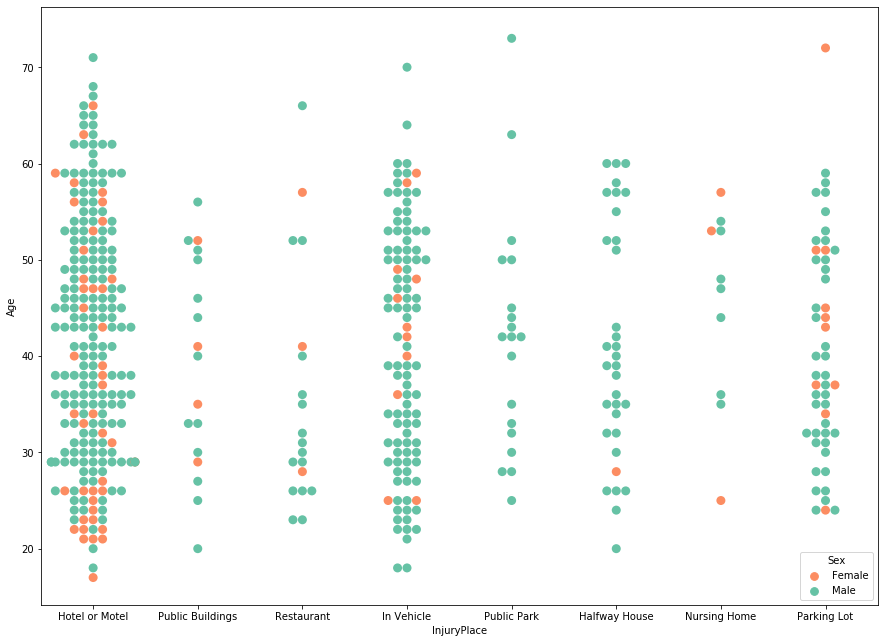

In [34]:
hi = df[df.InjuryPlace.isin(['Hotel or Motel', 'In Vehicle', 'Parking Lot', 'Halfway House', 'Restaurant', 'Public Buildings', "Nursing Home", 'Driveway', 'Public Park', 'Sidewalk'])]

        
fig, ax = plt.subplots(figsize=(15,11))
chart = sns.swarmplot(ax=ax, x="InjuryPlace", y="Age", hue='Sex',
                      palette=["#fc8d62", "#66c2a5"], size = 9, data=hi)

plt.savefig("chart2.pdf")


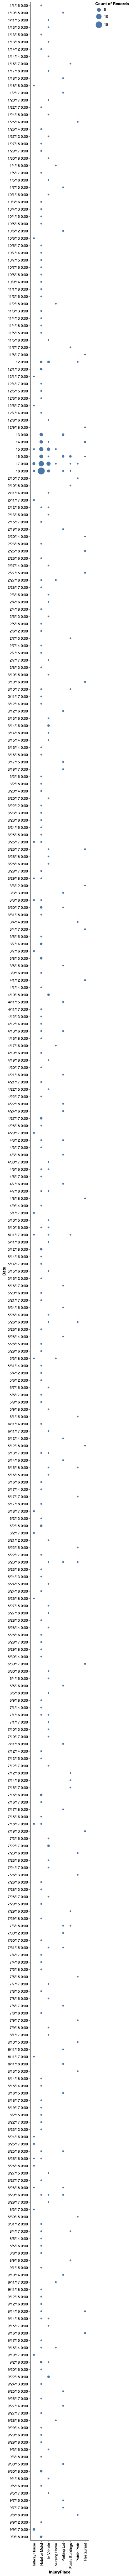

In [35]:
hi = df[df.InjuryPlace.isin(['Hotel or Motel', 'In Vehicle', 'Parking Lot', 'Halfway House', 'Restaurant', 'Public Buildings', "Nursing Home", 'Driveway', 'Public Park', 'Sidewalk'])]

source = hi

alt.Chart(source).mark_circle().encode(
    x='InjuryPlace',
    y='Date',
    size='count()'
)

# chart.save('chart.svg')


In [36]:
df2 = pd.read_csv("totaldeathsbyrace.csv")

In [40]:
df2.head()

,year,total deaths,female,male,asian,black,hispanic,white,% female,% male,% asian,% black,% hispanic,% white
0,2012,355,97,258,2,38,38,274,27.3,72.7,0.6,10.7,10.7,77.2
1,2013,490,140,350,2,44,52,388,28.6,71.4,0.4,9.0,10.6,79.2
2,2014,557,167,390,2,27,57,468,30.0,70.0,0.4,4.8,10.2,84.0
3,2015,726,190,536,3,46,79,593,26.2,73.8,0.4,6.3,10.9,81.7
4,2016,917,232,685,7,86,101,711,25.3,74.7,0.8,9.4,11.0,77.5


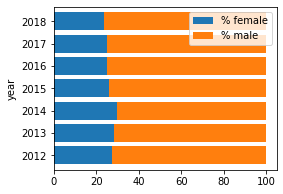

In [37]:
df2.plot(x='year', 
         y=['% female', '% male'], 
         kind='barh', 
         figsize = (4,3),
         width=0.8,
         stacked=True)
plt.savefig('gender.pdf')

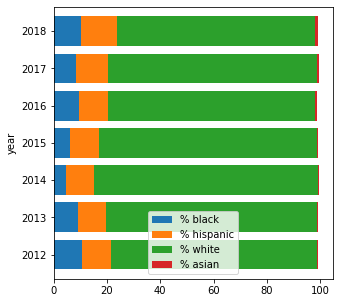

In [41]:
df2.plot(x='year', 
         y=['% black', 
            '% hispanic', 
            '% white',
            '% asian'], 
         kind='barh',
         figsize = (5,5),
         width=0.8,
         stacked=True)
plt.savefig('race2.pdf')

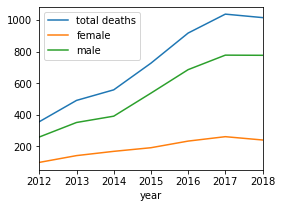

In [39]:
df2.plot(x='year', 
         y=['total deaths', 'female', 'male'], 
         kind='line',
         figsize = (4,3))
plt.savefig('deathsperyear.pdf')